## This is a new evaluation for presentation at SCIA-2024 (Takamatsu)

In [14]:
import numpy as np
import scipy as sp
from scipy import stats
import periodicity_detection as period
import time
from src.gen_synthetic import sinewave
import src.onlineSLE as utility

import matplotlib.pyplot as plt

## Full length data

In [15]:
np.random.seed(0)
seasonal = sinewave(25000,100,1)
residual = 0.2 * np.random.randn(len(seasonal))
ts = stats.zscore(seasonal+ residual)

window_sizes = range(300,10000,200)
print(window_sizes)
com_time = []
num_sliding_window = 10000

range(300, 10000, 200)


## Periodogram

In [16]:
## NumpyFFT

for window_size in window_sizes:
    total_time = 0
    W = ts[:window_size]
    start_fft = np.fft.fft(W)
    xfreq, p_den = utility.peridogram(window_size, start_fft)
    for idx in range(0,num_sliding_window):
        newest_x = ts[window_size+idx]
        oldest_x = W[0]
        W = W[1:]
        W = np.append(W, newest_x)
        start_time = time.time()            # start time
        start_fft = np.fft.fft(W)
        xfreq, p_den = utility.peridogram(window_size, start_fft)
        end_time = time.time()              # end time
        total_time += (end_time - start_time)
    avg_time_ms = (total_time / num_sliding_window) * 1000
    print({'algorithm': 'numpy.FFT',
                    'window_size': window_size,
                    'avg_time': avg_time_ms})
    com_time.append({'algorithm': 'numpy.FFT',
                    'window_size': window_size,
                    'avg_time': avg_time_ms})

{'algorithm': 'numpy.FFT', 'window_size': 300, 'avg_time': 0.008179688453674318}
{'algorithm': 'numpy.FFT', 'window_size': 500, 'avg_time': 0.012862277030944825}
{'algorithm': 'numpy.FFT', 'window_size': 700, 'avg_time': 0.012623786926269531}
{'algorithm': 'numpy.FFT', 'window_size': 900, 'avg_time': 0.015488910675048827}
{'algorithm': 'numpy.FFT', 'window_size': 1100, 'avg_time': 0.01609351634979248}
{'algorithm': 'numpy.FFT', 'window_size': 1300, 'avg_time': 0.01996738910675049}
{'algorithm': 'numpy.FFT', 'window_size': 1500, 'avg_time': 0.037980151176452634}
{'algorithm': 'numpy.FFT', 'window_size': 1700, 'avg_time': 0.041293311119079586}
{'algorithm': 'numpy.FFT', 'window_size': 1900, 'avg_time': 0.03285949230194092}
{'algorithm': 'numpy.FFT', 'window_size': 2100, 'avg_time': 0.03892881870269776}
{'algorithm': 'numpy.FFT', 'window_size': 2300, 'avg_time': 0.04331893920898438}
{'algorithm': 'numpy.FFT', 'window_size': 2500, 'avg_time': 0.04784750938415527}
{'algorithm': 'numpy.FFT',

In [17]:
## Scipy FFt
for window_size in window_sizes:
    total_time = 0
    W = ts[:window_size]
    start_fft = sp.fft.fft(W)
    xfreq, p_den = utility.peridogram(window_size, start_fft)
    for idx in range(0,num_sliding_window):
        newest_x = ts[window_size+idx]
        oldest_x = W[0]
        W = W[1:]
        W = np.append(W, newest_x)
        start_time = time.time()                        # start time
        start_fft = sp.fft.fft(W)
        xfreq, p_den = utility.peridogram(window_size, start_fft)
        end_time = time.time()                          # end time
        total_time += (end_time - start_time)
    avg_time_ms = (total_time / num_sliding_window) * 1000
    print({'algorithm': 'scipy.FFT',
                    'window_size': window_size,
                    'avg_time': avg_time_ms})
    com_time.append({'algorithm': 'scipy.FFT',
                    'window_size': window_size,
                    'avg_time': avg_time_ms})

{'algorithm': 'scipy.FFT', 'window_size': 300, 'avg_time': 0.008621859550476075}
{'algorithm': 'scipy.FFT', 'window_size': 500, 'avg_time': 0.010144400596618652}
{'algorithm': 'scipy.FFT', 'window_size': 700, 'avg_time': 0.012224650382995604}
{'algorithm': 'scipy.FFT', 'window_size': 900, 'avg_time': 0.01369943618774414}
{'algorithm': 'scipy.FFT', 'window_size': 1100, 'avg_time': 0.015827441215515135}
{'algorithm': 'scipy.FFT', 'window_size': 1300, 'avg_time': 0.017577910423278807}
{'algorithm': 'scipy.FFT', 'window_size': 1500, 'avg_time': 0.019122767448425292}
{'algorithm': 'scipy.FFT', 'window_size': 1700, 'avg_time': 0.02155463695526123}
{'algorithm': 'scipy.FFT', 'window_size': 1900, 'avg_time': 0.02377164363861084}
{'algorithm': 'scipy.FFT', 'window_size': 2100, 'avg_time': 0.03648927211761475}
{'algorithm': 'scipy.FFT', 'window_size': 2300, 'avg_time': 0.032094788551330564}
{'algorithm': 'scipy.FFT', 'window_size': 2500, 'avg_time': 0.0344876766204834}
{'algorithm': 'scipy.FFT',

In [18]:
## SDFT
for window_size in window_sizes:
    total_time = 0
    W = ts[:window_size]
    start_fft = np.fft.fft(W)
    xfreq, p_den = utility.peridogram(window_size, start_fft)
    N = len(start_fft)
    k = np.arange(N)
    twiddle = np.exp(2j * np.pi * k / N)
    for idx in range(0,num_sliding_window):
        newest_x = ts[window_size+idx]
        oldest_x = W[0]
        W = W[1:]
        W = np.append(W, newest_x)
        start_time = time.time()                              # start time
        start_fft = utility.update_sDFT(start_fft, oldest_x, newest_x, twiddle)
        xfreq, p_den = utility.peridogram(window_size, start_fft)
        end_time = time.time()                                # end time
        total_time += (end_time - start_time)
    
    avg_time_ms = (total_time / num_sliding_window) * 1000
    print({'algorithm': 'SDFT',
                    'window_size': window_size,
                    'avg_time': avg_time_ms})
    com_time.append({'algorithm': 'SDFT',
                    'window_size': window_size,
                    'avg_time': avg_time_ms})

{'algorithm': 'SDFT', 'window_size': 300, 'avg_time': 0.007167959213256836}
{'algorithm': 'SDFT', 'window_size': 500, 'avg_time': 0.007907819747924805}
{'algorithm': 'SDFT', 'window_size': 700, 'avg_time': 0.009437012672424316}
{'algorithm': 'SDFT', 'window_size': 900, 'avg_time': 0.010637569427490234}
{'algorithm': 'SDFT', 'window_size': 1100, 'avg_time': 0.01152358055114746}
{'algorithm': 'SDFT', 'window_size': 1300, 'avg_time': 0.012562251091003418}
{'algorithm': 'SDFT', 'window_size': 1500, 'avg_time': 0.013501667976379394}
{'algorithm': 'SDFT', 'window_size': 1700, 'avg_time': 0.014530205726623535}
{'algorithm': 'SDFT', 'window_size': 1900, 'avg_time': 0.01569230556488037}
{'algorithm': 'SDFT', 'window_size': 2100, 'avg_time': 0.016522765159606934}
{'algorithm': 'SDFT', 'window_size': 2300, 'avg_time': 0.017375469207763672}
{'algorithm': 'SDFT', 'window_size': 2500, 'avg_time': 0.019272541999816897}
{'algorithm': 'SDFT', 'window_size': 2700, 'avg_time': 0.019190263748168946}
{'alg

## All SLE methods

In [19]:
# Findlength
num_sliding_window = 1000
for window_size in window_sizes:
    total_time = 0  # To accumulate the total execution time of period.find_length(buffer)
    #
    for idx in range(0,num_sliding_window):
        W = ts[idx:window_size + idx]
        start_time = time.time()
        SLE_result = period.find_length(W)
        end_time = time.time()
        total_time += (end_time - start_time)
    
    
    avg_time_ms = (total_time / num_sliding_window) * 1000
    print({'algorithm': 'FindLength',
                    'window_size': window_size,
                    'avg_time': avg_time_ms})
    com_time.append({'algorithm': 'FindLength',
                    'window_size': window_size,
                    'avg_time': avg_time_ms})

{'algorithm': 'FindLength', 'window_size': 300, 'avg_time': 0.06375479698181152}
{'algorithm': 'FindLength', 'window_size': 500, 'avg_time': 0.04910683631896973}
{'algorithm': 'FindLength', 'window_size': 700, 'avg_time': 0.05869865417480469}
{'algorithm': 'FindLength', 'window_size': 900, 'avg_time': 0.07236194610595703}
{'algorithm': 'FindLength', 'window_size': 1100, 'avg_time': 0.08185291290283203}
{'algorithm': 'FindLength', 'window_size': 1300, 'avg_time': 0.08004045486450195}
{'algorithm': 'FindLength', 'window_size': 1500, 'avg_time': 0.08386516571044922}
{'algorithm': 'FindLength', 'window_size': 1700, 'avg_time': 0.09490966796875}
{'algorithm': 'FindLength', 'window_size': 1900, 'avg_time': 0.09469079971313477}
{'algorithm': 'FindLength', 'window_size': 2100, 'avg_time': 0.11881399154663086}
{'algorithm': 'FindLength', 'window_size': 2300, 'avg_time': 0.12229132652282715}
{'algorithm': 'FindLength', 'window_size': 2500, 'avg_time': 0.12032175064086914}
{'algorithm': 'FindLeng

In [25]:
# OnlineSLE
for window_size in window_sizes:
    total_time = 0
    buffer = ts[:window_size]
    start_fft = sp.fft.fft(buffer)
    xfreq, p_den = utility.peridogram(window_size, start_fft)
    peak_index = utility.get_period_hints(p_den)
    N = len(start_fft)
    k = np.arange(N)
    twiddle = np.exp(2j * np.pi * k / N)
    for idx in range(0,num_sliding_window):
        newest_x = ts[window_size+idx]
        oldest_x = buffer[0]
        W = W[1:]
        W = np.append(W, newest_x)
        start_time = time.time()
        start_fft = utility.update_sDFT(start_fft, oldest_x, newest_x, twiddle)
        xfreq, p_den = utility.peridogram(window_size, start_fft)
        peak_index = utility.get_period_hints(p_den)
        end_time = time.time()
        total_time += (end_time - start_time)

    
    avg_time_ms = (total_time / num_sliding_window) * 1000

    print({'algorithm': 'OnlineSLE',
                    'window_size': window_size,
                    'avg_time': avg_time_ms})
    com_time.append({'algorithm': 'OnlineSLE',
                    'window_size': window_size,
                    'avg_time': avg_time_ms})

{'algorithm': 'OnlineSLE', 'window_size': 300, 'avg_time': 0.013986825942993164}
{'algorithm': 'OnlineSLE', 'window_size': 500, 'avg_time': 0.012061834335327148}
{'algorithm': 'OnlineSLE', 'window_size': 700, 'avg_time': 0.011897087097167969}
{'algorithm': 'OnlineSLE', 'window_size': 900, 'avg_time': 0.012093305587768555}
{'algorithm': 'OnlineSLE', 'window_size': 1100, 'avg_time': 0.013168811798095703}
{'algorithm': 'OnlineSLE', 'window_size': 1300, 'avg_time': 0.013992786407470703}
{'algorithm': 'OnlineSLE', 'window_size': 1500, 'avg_time': 0.015344142913818361}
{'algorithm': 'OnlineSLE', 'window_size': 1700, 'avg_time': 0.016042470932006836}
{'algorithm': 'OnlineSLE', 'window_size': 1900, 'avg_time': 0.01705169677734375}
{'algorithm': 'OnlineSLE', 'window_size': 2100, 'avg_time': 0.018114566802978516}
{'algorithm': 'OnlineSLE', 'window_size': 2300, 'avg_time': 0.019338607788085938}
{'algorithm': 'OnlineSLE', 'window_size': 2500, 'avg_time': 0.027272939682006836}
{'algorithm': 'Online

In [26]:
# AutoPeriod
for window_size in window_sizes:
    total_time = 0  # To accumulate the total execution time of period.find_length(buffer)
    #
    for idx in range(0,num_sliding_window):
        W = ts[idx:window_size + idx]
        start_time = time.time()
        SLE_result = period.autoperiod(W)
        end_time = time.time()
        total_time += (end_time - start_time)
    
    avg_time_ms = (total_time / num_sliding_window) * 1000
    print({'algorithm': 'AutoPeriod',
                    'window_size': window_size,
                    'avg_time': avg_time_ms})
    com_time.append({'algorithm': 'AutoPeriod',
                    'window_size': window_size,
                    'avg_time': avg_time_ms})

{'algorithm': 'AutoPeriod', 'window_size': 300, 'avg_time': 6.044331789016724}
{'algorithm': 'AutoPeriod', 'window_size': 500, 'avg_time': 5.860487699508667}
{'algorithm': 'AutoPeriod', 'window_size': 700, 'avg_time': 6.197257041931152}
{'algorithm': 'AutoPeriod', 'window_size': 900, 'avg_time': 6.577162981033325}
{'algorithm': 'AutoPeriod', 'window_size': 1100, 'avg_time': 6.840181350708008}
{'algorithm': 'AutoPeriod', 'window_size': 1300, 'avg_time': 7.131649494171143}
{'algorithm': 'AutoPeriod', 'window_size': 1500, 'avg_time': 7.722275495529175}
{'algorithm': 'AutoPeriod', 'window_size': 1700, 'avg_time': 7.944958448410035}
{'algorithm': 'AutoPeriod', 'window_size': 1900, 'avg_time': 8.17489242553711}
{'algorithm': 'AutoPeriod', 'window_size': 2100, 'avg_time': 8.408364057540894}
{'algorithm': 'AutoPeriod', 'window_size': 2300, 'avg_time': 8.85963487625122}
{'algorithm': 'AutoPeriod', 'window_size': 2500, 'avg_time': 9.080973863601685}
{'algorithm': 'AutoPeriod', 'window_size': 270

In [27]:
# SAZED
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
sazedR = importr('sazedR')          # sazedR in CRAN

for window_size in window_sizes:
    total_time = 0
    for idx in range(0,num_sliding_window):
        W = ts[idx:window_size + idx]
        W = robjects.FloatVector(W)
        start_time = time.time()
        SLE_result = sazedR.sazed(W)
        end_time = time.time()
        total_time += (end_time - start_time)
    
    avg_time_ms = (total_time / num_sliding_window) * 1000
    print({'algorithm': 'SAZED',
                    'window_size': window_size,
                    'avg_time': avg_time_ms})
    com_time.append({'algorithm': 'SAZED',
                    'window_size': window_size,
                    'avg_time': avg_time_ms})

{'algorithm': 'SAZED', 'window_size': 300, 'avg_time': 2.970956325531006}
{'algorithm': 'SAZED', 'window_size': 500, 'avg_time': 3.2626607418060303}
{'algorithm': 'SAZED', 'window_size': 700, 'avg_time': 4.053409099578857}
{'algorithm': 'SAZED', 'window_size': 900, 'avg_time': 4.268062353134155}
{'algorithm': 'SAZED', 'window_size': 1100, 'avg_time': 5.681976795196533}
{'algorithm': 'SAZED', 'window_size': 1300, 'avg_time': 6.479280710220337}
{'algorithm': 'SAZED', 'window_size': 1500, 'avg_time': 6.683234930038452}
{'algorithm': 'SAZED', 'window_size': 1700, 'avg_time': 7.846972703933716}
{'algorithm': 'SAZED', 'window_size': 1900, 'avg_time': 7.410200119018555}
{'algorithm': 'SAZED', 'window_size': 2100, 'avg_time': 9.839956760406494}
{'algorithm': 'SAZED', 'window_size': 2300, 'avg_time': 10.293546199798584}
{'algorithm': 'SAZED', 'window_size': 2500, 'avg_time': 11.087953329086304}
{'algorithm': 'SAZED', 'window_size': 2700, 'avg_time': 13.151480913162231}
{'algorithm': 'SAZED', 'w

In [30]:
import pandas as pd
df = pd.DataFrame(com_time)

/var/folders/39/cpb13rr53hx1nyfrgqhk18pc0000gn/T/ipykernel_95748/55142410.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(algorithms))
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


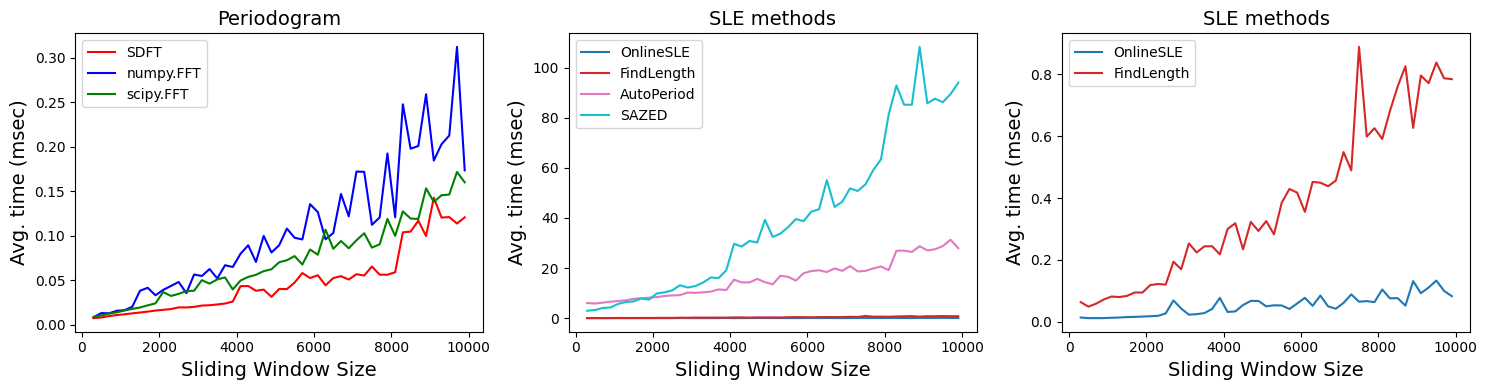

In [31]:

algorithms = ['OnlineSLE','FindLength','AutoPeriod', 'SAZED']
colors = plt.cm.get_cmap('tab10', len(algorithms))

fig, axs = plt.subplots(1, 3, figsize=(15, 4))


subset = df[df['algorithm'] == 'SDFT']
axs[0].plot(subset['window_size'], subset['avg_time'], linestyle='-', 
             color='red', label='SDFT')
subset = df[df['algorithm'] == 'numpy.FFT']
axs[0].plot(subset['window_size'], subset['avg_time'], linestyle='-', 
             color='blue', label='numpy.FFT')
subset = df[df['algorithm'] == 'scipy.FFT']
axs[0].plot(subset['window_size'], subset['avg_time'], linestyle='-', 
             color='green', label='scipy.FFT')

axs[0].set_xlabel('Sliding Window Size', fontsize=14)
axs[0].set_ylabel('Avg. time (msec)', fontsize=14) 
axs[0].set_title('Periodogram', fontsize=14)
axs[0].legend()

for i, algorithm in enumerate(algorithms):
    subset = df[df['algorithm'] == algorithm]
    axs[1].plot(subset['window_size'], subset['avg_time'], linestyle='-', 
             color=colors(i), label=algorithm)

# plt.title('Accuracy Rate (Fig5a)', fontsize=16)
axs[1].set_xlabel('Sliding Window Size', fontsize=14)
axs[1].set_ylabel('Avg. time (msec)', fontsize=14)
axs[1].set_title('SLE methods', fontsize=14)
axs[1].legend()

for i, algorithm in enumerate(algorithms[:2]):
    subset = df[df['algorithm'] == algorithm]
    axs[2].plot(subset['window_size'], subset['avg_time'], linestyle='-', 
             color=colors(i), label=algorithm)

# plt.title('Accuracy Rate (Fig5a)', fontsize=16)
axs[2].set_xlabel('Sliding Window Size', fontsize=14)
axs[2].set_ylabel('Avg. time (msec)', fontsize=14) 
axs[2].set_title('SLE methods', fontsize=14)
axs[2].legend()

plt.tight_layout()
plt.savefig('acc_time.eps',format='eps')

In [ ]:
colors = plt.cm.get_cmap('tab10', len(algorithms))
colors